# 01. Data Loading and preprocessing

In [53]:
#import neccessary libraries
import pandas as pd
import numpy as np

In [54]:
#Load the dataset
df = pd.read_csv("IMDb_Top10_Movies.csv")
df.head()

,Title,Year,Rating,Genre,Director(s),Box Office Revenue,Lead Actors
0,1. The Shawshank Redemption,1994,9.3 (3M),"Epic, Period Drama, Prison Drama, Drama","The Ink Spots, Jack Lawrence, Stephen King, Ti...","Gross worldwide$29,332,133","Bob Gunton, Morgan Freeman, Tim Robbins"
1,2. The Godfather,1972,9.2 (2.1M),"Epic, Gangster, Tragedy, Crime, Drama","Mario Puzo, Marlon Brando, Peter Clemenza, Al ...","Gross worldwide$250,342,198","Al Pacino, Marlon Brando, James Caan"
2,3. The Dark Knight,2008,9.0 (3M),"Action Epic, Epic, Superhero, Tragedy, Action,...","Aaron Eckhart, Michael Caine, The Joker, Jonat...","Gross worldwide$1,009,057,329","Aaron Eckhart, Christian Bale, Heath Ledger"
3,4. The Godfather Part II,1974,9.0 (1.4M),"Epic, Gangster, Tragedy, Crime, Drama","Mario Puzo, Francesco Pennino, Al Pacino, Robe...","Gross worldwide$47,964,222","Al Pacino, Robert De Niro, Robert Duvall"
4,5. 12 Angry Men,1957,9.0 (917K),"Legal Drama, Psychological Drama, Crime, Drama","Henry Fonda, Jack Warden, Lee J. Cobb, Juror #...","Gross worldwide$2,945","Henry Fonda, Martin Balsam, Lee J. Cobb"


In [55]:
#Check no.of rows and colunms
df.shape

(250, 7)

In [56]:
#Check the data types
df.dtypes

Title                 object
Year                   int64
Rating                object
Genre                 object
Director(s)           object
Box Office Revenue    object
Lead Actors           object
dtype: object

•	Filtering the Data set with the Movie list for past two decades ( 2004 to 2024).

Since we were asked to analyze data from the past two decades, filtered the dataset for the past two decades. To ensure the data quality, data cleaning was done by checking and removing the missing values and duplicated rows. 

It is ensured that the type year is numeric and converted to integer. If the year is stored as string (object), when comparing the years, it will compare alphabetically instead of numerically. Also, the invalid and unexpected values in the Year column were replaced by NaN and then removed. This ensures the correct filtering of movies between 2004 to 2024. The filtered dataset is stored as "df_IMDb" .

In [58]:
#Filtering the Data set with the Movie list for past two decades (2004 to 2024)

# Ensure Year is numeric and Converts non-numeric values to NaN
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")  

# Drop rows where Year is NaN 
df = df.dropna(subset=["Year"])

# Convert 'Year' to integer for proper comparison
df["Year"] = df["Year"].astype(int)

# Define the year range (2004 to 2024)
df_IMDb = df[(df["Year"] >= 2004) & (df["Year"] <= 2024)]
 

In [59]:
#Check no.of rows and colunms of dataset after filtering
df_IMDb.shape

(86, 7)

•	Clean the Rating column 

To extract only the numeric value of ratings such as 9.0 from the values in the format of 9.0(3M) used regular expression by removing everything after the decimal number including parentheses. Then converted the cleaned rating column to numeric, replaced the non-numeric values with NaN and dropped them since they were invalid.

In [61]:
# Clean the Rating column to extract only the numeric value before parentheses using 
import re

df_IMDb['Rating'] = df_IMDb['Rating'].apply(lambda x: re.sub(r'\s?\(.*\)', '', str(x)))

# Convert to numeric, replacing non-numeric values to NaN
df_IMDb['Rating'] = pd.to_numeric(df_IMDb['Rating'], errors='coerce')

# Drop rows where Rating is NaN 
df_IMDb = df_IMDb.dropna(subset=['Rating'])

# Check the cleaned data
print(df_IMDb[['Title', 'Rating']].head())


                 Title  Rating
2   3. The Dark Knight     9.0
13       14. Inception     8.8
18    19. Interstellar     8.7
33        34. Parasite     8.5
37    38. The Departed     8.5


C:\Users\User\AppData\Local\Temp\ipykernel_24908\558686235.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IMDb['Rating'] = df_IMDb['Rating'].apply(lambda x: re.sub(r'\s?\(.*\)', '', str(x)))
C:\Users\User\AppData\Local\Temp\ipykernel_24908\558686235.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IMDb['Rating'] = pd.to_numeric(df_IMDb['Rating'], errors='coerce')


•	Cleaning the Box Office Revenue

To extract the numeric values of the revenue such as “758464713” from the values given as "Gross worldwide$758,464,713" ,used regular expression to  removing the "Gross worldwide#" and the commas to make sure the values are pure numbers. Then converted the cleaned revenue column to numeric, replaced the non-numeric values with NaN and dropped them since they were invalid. 

In [63]:
import re

# Clean Box Office Revenue column to extract only the numeric value
df_IMDb['Box Office Revenue'] = df_IMDb['Box Office Revenue'].apply(
    lambda x: re.sub(r'Gross worldwide\$', '', str(x)).strip()
)

# Remove commas from inbetween the revenue values
df_IMDb['Box Office Revenue'] = df_IMDb['Box Office Revenue'].str.replace(',', '')

# Convert to numeric, replacing non-numeric values to NaN
df_IMDb['Box Office Revenue'] = pd.to_numeric(df_IMDb['Box Office Revenue'], errors='coerce')

# Drop rows where Box Office Revenue is NaN 
df_IMDb = df_IMDb.dropna(subset=['Box Office Revenue'])

# Check the cleaned data
print(df_IMDb[['Title', 'Box Office Revenue']].head())


                 Title  Box Office Revenue
2   3. The Dark Knight        1.009057e+09
13       14. Inception        8.390306e+08
18    19. Interstellar        7.584647e+08
33        34. Parasite        2.626081e+08
37    38. The Departed        2.914814e+08


•	Cleanign Movie Title

Removing any leading numbers and dots from the move title and keeps only the movie name to keep the Title column from unnecessary numbering

In [65]:
import re

# Clean the Title column by removing leading numbers and dots
df_IMDb['Title'] = df_IMDb['Title'].apply(lambda x: re.sub(r'^\d+\.\s*', '', str(x)))

# Display the cleaned column
print(df_IMDb[['Title']].head())


              Title
2   The Dark Knight
13        Inception
18     Interstellar
33         Parasite
37     The Departed


In [66]:
#Check the dataset after cleaning
df_IMDb.head()

,Title,Year,Rating,Genre,Director(s),Box Office Revenue,Lead Actors
2,The Dark Knight,2008,9.0,"Action Epic, Epic, Superhero, Tragedy, Action,...","Aaron Eckhart, Michael Caine, The Joker, Jonat...",1.009057e+09,"Aaron Eckhart, Christian Bale, Heath Ledger"
13,Inception,2010,8.8,"Action Epic, Adventure Epic, Epic, Psychologic...","Cobb, Joseph Gordon-Levitt, Leonardo DiCaprio,...",8.390306e+08,"Joseph Gordon-Levitt, Leonardo DiCaprio, Ellio..."
18,Interstellar,2014,8.7,"Adventure Epic, Epic, Quest, Sci-Fi Epic, Spac...","Jonathan Nolan, Cooper, Matthew McConaughey, K...",7.584647e+08,"Anne Hathaway, Jessica Chastain, Matthew McCon..."
33,Parasite,2019,8.5,"Dark Comedy, Korean Drama, Psychological Thril...","Song Kang-ho, Bong Joon Ho, Han Jin-won, Cho Y...",2.626081e+08,"Song Kang-ho, Cho Yeo-jeong, Lee Sun-kyun"
37,The Departed,2006,8.5,"Cop Drama, Epic, Gangster, Crime, Drama, Thriller","Felix Chong, Matt Damon, Dignam, William Monah...",2.914814e+08,"Matt Damon, Leonardo DiCaprio, Jack Nicholson"


In [67]:
# Check for null values in each column
df_IMDb.isnull().sum()
print("Null values in each column:\n", df_IMDb.isnull().sum())

Null values in each column:
 Title                 0
Year                  0
Rating                0
Genre                 0
Director(s)           0
Box Office Revenue    0
Lead Actors           0
dtype: int64


In [68]:
# Check for duplicated rows
df_IMDb.duplicated().sum()
print("Number of duplicate rows:", df_IMDb.duplicated().sum())

Number of duplicate rows: 0


In [69]:

# Convert Year column to integer
df_IMDb["Year"] = df_IMDb["Year"].astype(str)

# Convert Rating column to float
df_IMDb["Rating"] = pd.to_numeric(df_IMDb["Rating"], errors="coerce")

# Convert Box Office Revenue to numeric after cleaning 
df_IMDb["Box Office Revenue"] = pd.to_numeric(df_IMDb["Box Office Revenue"], errors="coerce")

# Convert categorical columns to string type
categorical_columns = ["Title", "Genre", "Director(s)", "Lead Actors"]
df_IMDb[categorical_columns] = df_IMDb[categorical_columns].astype(str)

df_IMDb.dtypes


Title                  object
Year                   object
Rating                float64
Genre                  object
Director(s)            object
Box Office Revenue    float64
Lead Actors            object
dtype: object

# 02. Statistical Analysis

In [92]:
# Display basic statistics for numerical columns Rating and Box Office Revenue

print("Summary Statistics for IMDb Dataset:\n")
print(df_IMDb[['Rating', 'Box Office Revenue', 'Year']].describe())

Summary Statistics for IMDb Dataset:

          Rating  Box Office Revenue
count  83.000000        8.300000e+01
mean    8.269880        3.933943e+08
std     0.189823        5.079335e+08
min     8.000000        6.735800e+04
25%     8.100000        4.855526e+07
50%     8.200000        2.218022e+08
75%     8.400000        5.111418e+08
max     9.000000        2.799439e+09


In [98]:
# Check the correlation between numerical columns
print("\nCorrelation between numerical variables:\n")
correlation_matrix = df_IMDb[['Rating', 'Box Office Revenue']].corr()
print(correlation_matrix)


Correlation between numerical variables:

                      Rating  Box Office Revenue
Rating              1.000000            0.207391
Box Office Revenue  0.207391            1.000000


In [104]:
from scipy.stats import zscore

# Compute Z-scores for revenue and rating
df_IMDb["Revenue_Z"] = zscore(df_IMDb["Box Office Revenue"])
df_IMDb["Rating_Z"] = zscore(df_IMDb["Rating"])

# Identify outliers (Z-score > 3 or < -3)
outliers = df_IMDb[(df_IMDb["Revenue_Z"].abs() > 3) | (df_IMDb["Rating_Z"].abs() > 3)]

# Display outliers
print(outliers[["Title", "Year", "Box Office Revenue", "Rating", "Revenue_Z", "Rating_Z"]])


                       Title  Year  Box Office Revenue  Rating  Revenue_Z  \
2            The Dark Knight  2008        1.009057e+09     9.0   1.219462   
60    Avengers: Infinity War  2018        2.052415e+09     8.4   3.286072   
74         Avengers: Endgame  2019        2.799439e+09     8.4   4.765725   
181  Spider-Man: No Way Home  2021        1.952732e+09     8.2   3.088627   

     Rating_Z  
2    3.869697  
60   0.689649  
74   0.689649  
181 -0.370367  


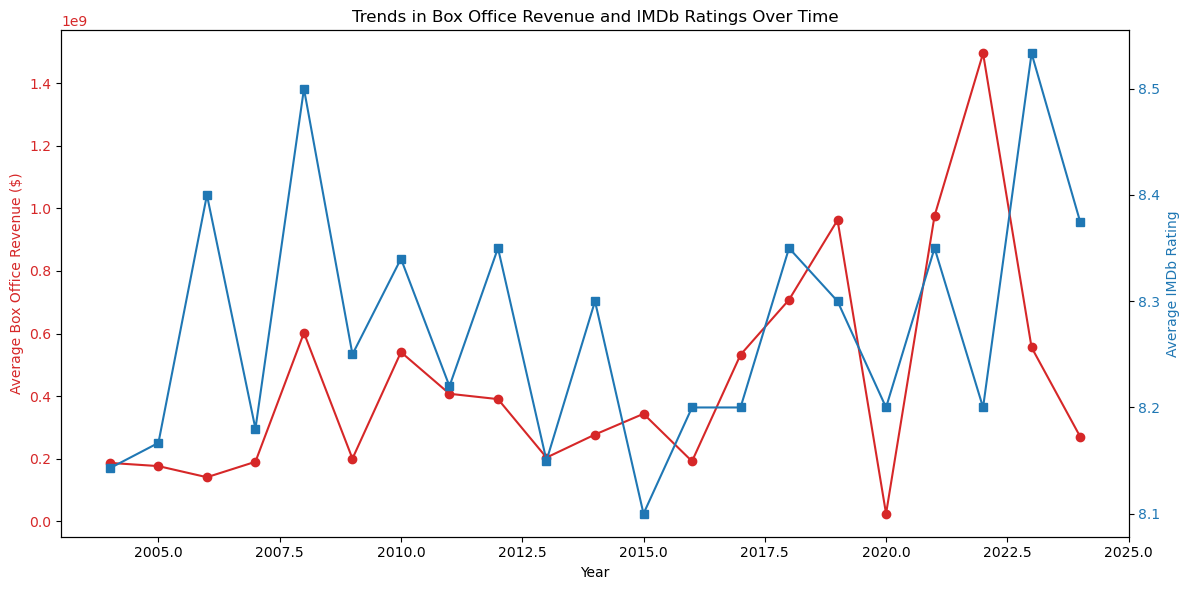

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Year' column to numeric 
df_IMDb["Year"] = pd.to_numeric(df_IMDb["Year"], errors="coerce")

# Sort dataset by Year
df_IMDb = df_IMDb.sort_values("Year")

# Plot Revenue and Rating Trends
fig, ax1 = plt.subplots(figsize=(12, 6))

# Revenue trend (Left Y-axis)
color = "tab:red"
ax1.set_xlabel("Year")
ax1.set_ylabel("Average Box Office Revenue ($)", color=color)
df_IMDb.groupby("Year")["Box Office Revenue"].mean().plot(ax=ax1, color=color, marker="o")
ax1.tick_params(axis="y", labelcolor=color)

# Create second Y-axis for Ratings
ax2 = ax1.twinx()
color = "tab:blue"
ax2.set_ylabel("Average IMDb Rating", color=color)
df_IMDb.groupby("Year")["Rating"].mean().plot(ax=ax2, color=color, marker="s")
ax2.tick_params(axis="y", labelcolor=color)

# Title and Show Plot
plt.title("Trends in Box Office Revenue and IMDb Ratings Over Time")
fig.tight_layout()
plt.show()
